#ID0205 - Geometría Computacional

### Primavera 2023

### ID0205_Lab-2.09

**Profesor Enrique Naredo García**

<font size = 2> 
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Queda prohibido compartir este documento entre otros estudiantes, aún siendo de la misma clase, grupo o de la Universidad sin consentimiento del autor. Queda prohibida la reproducción total o parcial de este documento por cualquier medio o procedimiento, ya sea electrónico o mecánico, el tratamiento informático, el alquiler o cualquier otra forma de cesión sin la autorización previa y por escrito del titular del copyright.*
</font>

Una [triangulación de Delaunay](https://es.wikipedia.org/wiki/Triangulaci%C3%B3n_de_Delaunay) (pronunciado «Deloné»), es una red de triángulos conexa y convexa que cumple la condición de Delaunay. 

* Esta condición dice que la circunferencia circunscrita de cada triángulo de la red no debe contener ningún vértice de otro triángulo. 

* Las triangulaciones de Delaunay tienen importante relevancia en el campo de la geometría computacional, especialmente en gráficos 3D por computadora. 

En este notebook se requiere que primero uses los siguientes nombres de los datos que vienen con la librería [Triangle](https://rufat.be/triangle/index.html) para realizar triangulaciones:

* 'spiral'
* 'ell'
* 'spiral'
* 'greenland'
* 'square_circle_hole'

**Nota:** Aplica un tipo de triangulación diferente en cada caso.

In [ ]:
# Aquí tu código









In [ ]:
# Aquí tu código









In [ ]:
# Aquí tu código









In [ ]:
# Aquí tu código









In [ ]:
# Aquí tu código









In [ ]:
B

NameError: ignored

In [ ]:
A

{'vertices': [[0, 0], [0, 1], [1, 1], [1, 0]]}

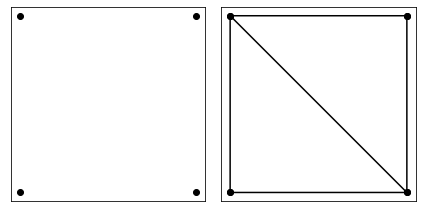

In [ ]:
pts = [[0, 0], [0, 1], [1, 1], [1, 0]]

segments = tr.convex_hull(pts)
A = dict(vertices=pts)

B = dict(vertices=tr.convex_hull(pts))

#B = tr.convex_hull(A)

tr.compare(plt, A, B) 


#tr.plot(plt.axes(), **A)
plt.show()

In [ ]:
segments

array([[3, 0],
       [2, 3],
       [1, 2],
       [0, 1]], dtype=int32)

In [ ]:
A

{'vertices': array([[0, 0],
        [0, 1],
        [1, 1],
        [1, 0]])}

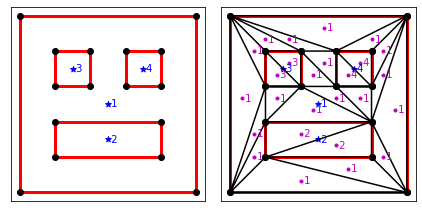

In [ ]:

# arrays to fill in with input
vertices = []
segments = []
regions = []

# make a box with given dims and place given attribute at its center
def make_box(x, y, w, h, attribute):

    i = len(vertices)
    
    vertices.extend([[x,   y],
                     [x+w, y],
                     [x+w, y+h],
                     [x,   y+h]])

    segments.extend([(i+0, i+1),
                     (i+1, i+2),
                     (i+2, i+3),
                     (i+3, i+0)])
    
    regions.append([x+0.5*w, y+0.5*h, attribute, 0])

# generate some input    
make_box(0, 0, 5, 5, 1)
make_box(1, 1, 3, 1, 2)
make_box(1, 3, 1, 1, 3)
make_box(3, 3, 1, 1, 4)

A = dict(vertices=vertices, segments=segments, regions=regions)
B = tr.triangulate(A, 'pA')
    
tr.compare(plt, A, B)
plt.show()

In [ ]:
def test_tripcolor():
    x = np.asarray([0, 0.5, 1, 0,   0.5, 1,   0, 0.5, 1, 0.75])
    y = np.asarray([0, 0,   0, 0.5, 0.5, 0.5, 1, 1,   1, 0.75])
    triangles = np.asarray([
        [0, 1, 3], [1, 4, 3],
        [1, 2, 4], [2, 5, 4],
        [3, 4, 6], [4, 7, 6],
        [4, 5, 9], [7, 4, 9], [8, 7, 9], [5, 8, 9]])

    # Triangulation with same number of points and triangles.
    triang = mtri.Triangulation(x, y, triangles)

    Cpoints = x + 0.5*y

    xmid = x[triang.triangles].mean(axis=1)
    ymid = y[triang.triangles].mean(axis=1)
    Cfaces = 0.5*xmid + ymid

    plt.subplot(121)
    plt.tripcolor(triang, Cpoints, edgecolors='k')
    plt.title('point colors')

    plt.subplot(122)
    plt.tripcolor(triang, facecolors=Cfaces, edgecolors='k')
    plt.title('facecolors') 

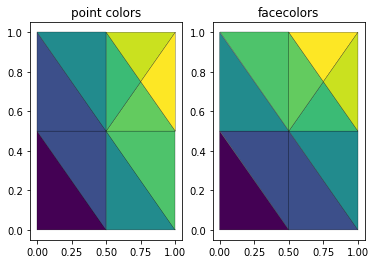

In [ ]:
test_tripcolor()

In [ ]:
def test_tripcolor():
    x = np.asarray([0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0.75])

    y = np.asarray([0, 0, 0, 0.5, 0.5, 0.5, 1, 1, 1, 0.75])

    triangles = np.asarray([
        [0, 1, 3], [1, 4, 3],
        [1, 2, 4], [2, 5, 4],
        [3, 4, 6], [4, 7, 6],
        [4, 5, 9], [7, 4, 9], 
        [8, 7, 9], [5, 8, 9]])

    # Triangulation with same number of points and triangles.
    triang = mtri.Triangulation(x, y, triangles)

    Cpoints = x + 0.5*y

    xmid = x[triang.triangles].mean(axis=1)
    ymid = y[triang.triangles].mean(axis=1)
    Cfaces = 0.5*xmid + ymid

    plt.subplot(121)
    plt.tripcolor(triang, Cpoints, edgecolors='k')
    plt.title('point colors')

    plt.subplot(122)
    plt.tripcolor(triang, facecolors=Cfaces, edgecolors='k')
    plt.title('facecolors') 

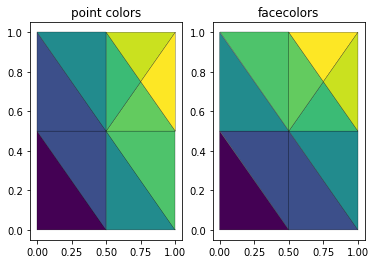

In [ ]:
test_tripcolor()

In [ ]:
# Recursive implementation for minimum
# cost convex polygon triangulation
from math import sqrt
MAX = 1000000.0

# A utility function to find distance
# between two points in a plane
def dist(p1, p2):
	return sqrt((p1[0] - p2[0])*(p1[0] - p2[0]) + \
				(p1[1] - p2[1])*(p1[1] - p2[1]))

# A utility function to find cost of
# a triangle. The cost is considered
# as perimeter (sum of lengths of all edges)
# of the triangle
def cost(points, i, j, k):
	p1 = points[i]
	p2 = points[j]
	p3 = points[k]
	return dist(p1, p2) + dist(p2, p3) + dist(p3, p1)


# A recursive function to find minimum
# cost of polygon triangulation
# The polygon is represented by points[i..j].
def mTC(points, i, j):
	
	# There must be at least three points between i and j
	# (including i and j)
	if (j < i + 2):
		return 0
		
	# Initialize result as infinite
	res = MAX
	
	# Find minimum triangulation by considering all
	for k in range(i + 1, j):
		res = min(res, (mTC(points, i, k) + \
						mTC(points, k, j) + \
						cost(points, i, k, j)))
	
	return round(res, 4)


# Driver code
points = [[0, 0], [1, 0], [2, 1], [1, 2], [0, 2]]
n = len(points)
print(mTC(points, 0, n-1))

# This code is contributed by SHUBHAMSINGH10


15.3006


In [ ]:
x = np.asarray([0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0.75])

y = np.asarray([0, 0, 0, 0.5, 0.5, 0.5, 1, 1, 1, 0.75])

In [ ]:
!pip install polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.3 MB/s eta 0:00:00


In [ ]:
import polygon as Polygon
from polygon import (StocksClient, ForexClient, StreamClient, build_option_symbol)

In [ ]:


P = Polygon [(2.00, 3.00), (3.00, 3.00), (3.00, 2.00), (4.00, 2.00), (4.00, 4.00), (2.00, 4.00)] 

P = Polygon.convex_decompose(P)

TypeError: ignored

In [ ]:
# Aquí tu código












In [ ]:
def test_triinterpcubic_geom_weights():
    # Tests to check computation of weights for _DOF_estimator_geom:
    # The weight sum per triangle can be 1. (in case all angles < 90 degrees)
    # or (2*w_i) where w_i = 1-alpha_i/np.pi is the weight of apex i ; alpha_i
    # is the apex angle > 90 degrees.
    (ax, ay) = (0., 1.687)
    x = np.array([ax, 0.5*ax, 0., 1.])
    y = np.array([ay, -ay, 0., 0.])
    z = np.zeros(4, dtype=np.float64)
    triangles = [[0, 2, 3], [1, 3, 2]]
    sum_w = np.zeros([4, 2])  # 4 possibilities ; 2 triangles
    for theta in np.linspace(0., 2*np.pi, 14):  # rotating the figure...
        x_rot = np.cos(theta)*x + np.sin(theta)*y
        y_rot = -np.sin(theta)*x + np.cos(theta)*y
        triang = mtri.Triangulation(x_rot, y_rot, triangles)
        cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
        dof_estimator = mtri.triinterpolate._DOF_estimator_geom(cubic_geom)
        weights = dof_estimator.compute_geom_weights()
        # Testing for the 4 possibilities...
        sum_w[0, :] = np.sum(weights, 1) - 1
        for itri in range(3):
            sum_w[itri+1, :] = np.sum(weights, 1) - 2*weights[:, itri]
        assert_array_almost_equal(np.min(np.abs(sum_w), axis=0),

In [ ]:
def test_triplot_return():
    # Check that triplot returns the artists it adds
    from matplotlib.figure import Figure
    ax = Figure().add_axes([0.1, 0.1, 0.7, 0.7])
    triang = mtri.Triangulation(
        [0.0, 1.0, 0.0, 1.0], [0.0, 0.0, 1.0, 1.0],
        triangles=[[0, 1, 3], [3, 2, 0]])
    if ax.triplot(triang, "b-") is None:
        raise AssertionError("triplot should return the artist it adds") 

In [ ]:
test_triplot_return()

**Ejemplo**

Triangulación en varios objetos.

In [ ]:
# Crear cajas (cuadros) y definir sus centros
def crea_cuadro(x, y, w, h, atributo):
    # declarar arreglos
    vertices = []
    segmentos = []
    regiones = []
    
    # cantidad de vertices
    i = len(vertices)
    # agrega vertices en el arreglo
    vertices.extend([[x,   y],
                     [x+w, y],
                     [x+w, y+h],
                     [x,   y+h]])
    # agrega segmentos en el arreglo
    segmentos.extend([(i+0, i+1),
                     (i+1, i+2),
                     (i+2, i+3),
                     (i+3, i+0)])
    
    regiones.append([x+0.5*w, y+0.5*h, atributo, 0])

In [ ]:
# generate some input    
crea_cuadro(0, 0, 5, 5, 1)
crea_cuadro(1, 1, 3, 1, 2)
crea_cuadro(1, 3, 1, 1, 3)
crea_cuadro(3, 3, 1, 1, 4)

In [ ]:





A = dict(vertices=vertices, segments=segmentos, regions=regiones)
B = tr.triangulate(A, 'pA')
    
tr.compare(plt, A, B)
plt.show()

NameError: ignored

**Ejemplo**

Triangulación en una espiral.

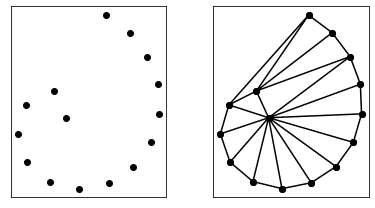

In [ ]:
# puntos de espiral que viene con la librería
spiral = tr.get_data('spiral') # A, ell, spiral, dots, face, 

# triangula usando puntos de espiral
t = tr.triangulate(spiral)

# compara puntos y trinagulación
tr.compare(plt, spiral, t)

# muestra ambas graficas
plt.show()

In [ ]:
v = [[0, 0], [0, 1], [1, 1], [1, 0]]

t = tr.triangulate({'vertices': v}, 'a0.2')

t['vertices'].tolist()
[[0.0, 0.0], [0.0, 1.0], [1.0, 1.0], [1.0, 0.0], [0.5, 0.5], [0.0, 0.5], [0.5, 0.0], [1.0, 0.5], [0.5, 1.0]]

t['vertex_markers'].tolist()
[[1], [1], [1], [1], [0], [1], [1], [1], [1]]

t['triangles'].tolist()
[[7, 2, 4], [5, 0, 4], [4, 8, 1], [4, 1, 5], [4, 0, 6], [6, 3, 4], [4, 3, 7], [4, 2, 8]]

[[7, 2, 4],
 [5, 0, 4],
 [4, 8, 1],
 [4, 1, 5],
 [4, 0, 6],
 [6, 3, 4],
 [4, 3, 7],
 [4, 2, 8]]

In [ ]:
def test_tripcolor():
    x = np.asarray([0, 0.5, 1, 0,   0.5, 1,   0, 0.5, 1, 0.75])
    y = np.asarray([0, 0,   0, 0.5, 0.5, 0.5, 1, 1,   1, 0.75])
    triangles = np.asarray([
        [0, 1, 3], [1, 4, 3],
        [1, 2, 4], [2, 5, 4],
        [3, 4, 6], [4, 7, 6],
        [4, 5, 9], [7, 4, 9], [8, 7, 9], [5, 8, 9]])

    # Triangulation with same number of points and triangles.
    triang = mtri.Triangulation(x, y, triangles)

    Cpoints = x + 0.5*y

    xmid = x[triang.triangles].mean(axis=1)
    ymid = y[triang.triangles].mean(axis=1)
    Cfaces = 0.5*xmid + ymid

    plt.subplot(121)
    plt.tripcolor(triang, Cpoints, edgecolors='k')
    plt.title('point colors')

    plt.subplot(122)
    plt.tripcolor(triang, facecolors=Cfaces, edgecolors='k')
    plt.title('facecolors') 

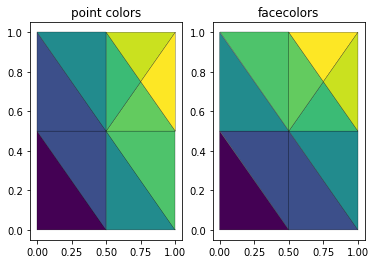

In [ ]:
test_tripcolor()

In [ ]:
def test_tripcolor():
    x = np.asarray([0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0.75])

    y = np.asarray([0, 0, 0, 0.5, 0.5, 0.5, 1, 1, 1, 0.75])

    triangles = np.asarray([
        [0, 1, 3], [1, 4, 3],
        [1, 2, 4], [2, 5, 4],
        [3, 4, 6], [4, 7, 6],
        [4, 5, 9], [7, 4, 9], 
        [8, 7, 9], [5, 8, 9]])

    # Triangulation with same number of points and triangles.
    triang = mtri.Triangulation(x, y, triangles)

    Cpoints = x + 0.5*y

    xmid = x[triang.triangles].mean(axis=1)
    ymid = y[triang.triangles].mean(axis=1)
    Cfaces = 0.5*xmid + ymid

    plt.subplot(121)
    plt.tripcolor(triang, Cpoints, edgecolors='k')
    plt.title('point colors')

    plt.subplot(122)
    plt.tripcolor(triang, facecolors=Cfaces, edgecolors='k')
    plt.title('facecolors') 

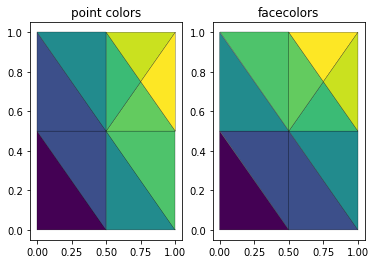

In [ ]:
test_tripcolor()

In [ ]:
# Recursive implementation for minimum
# cost convex polygon triangulation
from math import sqrt
MAX = 1000000.0

# A utility function to find distance
# between two points in a plane
def dist(p1, p2):
	return sqrt((p1[0] - p2[0])*(p1[0] - p2[0]) + \
				(p1[1] - p2[1])*(p1[1] - p2[1]))

# A utility function to find cost of
# a triangle. The cost is considered
# as perimeter (sum of lengths of all edges)
# of the triangle
def cost(points, i, j, k):
	p1 = points[i]
	p2 = points[j]
	p3 = points[k]
	return dist(p1, p2) + dist(p2, p3) + dist(p3, p1)


# A recursive function to find minimum
# cost of polygon triangulation
# The polygon is represented by points[i..j].
def mTC(points, i, j):
	
	# There must be at least three points between i and j
	# (including i and j)
	if (j < i + 2):
		return 0
		
	# Initialize result as infinite
	res = MAX
	
	# Find minimum triangulation by considering all
	for k in range(i + 1, j):
		res = min(res, (mTC(points, i, k) + \
						mTC(points, k, j) + \
						cost(points, i, k, j)))
	
	return round(res, 4)


# Driver code
points = [[0, 0], [1, 0], [2, 1], [1, 2], [0, 2]]
n = len(points)
print(mTC(points, 0, n-1))

# This code is contributed by SHUBHAMSINGH10


15.3006


In [ ]:
x = np.asarray([0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0.75])

y = np.asarray([0, 0, 0, 0.5, 0.5, 0.5, 1, 1, 1, 0.75])

In [ ]:
!pip install polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.3 MB/s eta 0:00:00


In [ ]:
import polygon as Polygon
from polygon import (StocksClient, ForexClient, StreamClient, build_option_symbol)

In [ ]:


P = Polygon [(2.00, 3.00), (3.00, 3.00), (3.00, 2.00), (4.00, 2.00), (4.00, 4.00), (2.00, 4.00)] 

P = Polygon.convex_decompose(P)

TypeError: ignored

In [ ]:
# Aquí tu código












In [ ]:
def test_triinterpcubic_geom_weights():
    # Tests to check computation of weights for _DOF_estimator_geom:
    # The weight sum per triangle can be 1. (in case all angles < 90 degrees)
    # or (2*w_i) where w_i = 1-alpha_i/np.pi is the weight of apex i ; alpha_i
    # is the apex angle > 90 degrees.
    (ax, ay) = (0., 1.687)
    x = np.array([ax, 0.5*ax, 0., 1.])
    y = np.array([ay, -ay, 0., 0.])
    z = np.zeros(4, dtype=np.float64)
    triangles = [[0, 2, 3], [1, 3, 2]]
    sum_w = np.zeros([4, 2])  # 4 possibilities ; 2 triangles
    for theta in np.linspace(0., 2*np.pi, 14):  # rotating the figure...
        x_rot = np.cos(theta)*x + np.sin(theta)*y
        y_rot = -np.sin(theta)*x + np.cos(theta)*y
        triang = mtri.Triangulation(x_rot, y_rot, triangles)
        cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
        dof_estimator = mtri.triinterpolate._DOF_estimator_geom(cubic_geom)
        weights = dof_estimator.compute_geom_weights()
        # Testing for the 4 possibilities...
        sum_w[0, :] = np.sum(weights, 1) - 1
        for itri in range(3):
            sum_w[itri+1, :] = np.sum(weights, 1) - 2*weights[:, itri]
        assert_array_almost_equal(np.min(np.abs(sum_w), axis=0),

In [ ]:
def test_triplot_return():
    # Check that triplot returns the artists it adds
    from matplotlib.figure import Figure
    ax = Figure().add_axes([0.1, 0.1, 0.7, 0.7])
    triang = mtri.Triangulation(
        [0.0, 1.0, 0.0, 1.0], [0.0, 0.0, 1.0, 1.0],
        triangles=[[0, 1, 3], [3, 2, 0]])
    if ax.triplot(triang, "b-") is None:
        raise AssertionError("triplot should return the artist it adds") 

In [ ]:
test_triplot_return()

In [ ]:
!pip install delaunay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from delaunay import delaunay

In [ ]:
xy = [[3.3735, 0.7889], [-0.1072, -3.4814], [-3.9732, 4.1955], [-5, 5], [5, 5], [5, -5], [-5, -5]];
DT = delaunayTriangulation(xy);
triplot(DT);
%The coordinates for each triangle -- each row is a triangle.
TRIX = reshape(DT.Points(DT.ConnectivityList, 1), size(DT.ConnectivityList));
TRIY = reshape(DT.Points(DT.ConnectivityList, 2), size(DT.ConnectivityList));

NameError: ignored